# BA - ASSIGNMENT 7:
## PART 1 : Exploratory Data Analysis & Text Analytics
*This database is a collection of complaints about consumer financial products and
services that we sent to companies for response. Download data for 2018 and completed
the following analysis:*


1. How many complaints have been generated.
2. How many are unique or recurring?
3. Using “"Consumer.complaint.narrative”, what can you say about the type of complaints in this report?
4. What type of product issues & complaints are the most frequency?
5. Complete a sentiment analysis for all the type of complaint submissions observed during this year.


### Lets load the data and do data exploration:

In [1]:
DF = read.csv("C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Consumer_Complaints.csv", na.strings = c("","NA"))

## 1. How many complaints have been generated.
### Soln:

In [2]:
cat("Number of complains registered were",nrow(DF))

Number of complains registered were 256557

## 2. How many are unique or recurring?
### Soln:

In [3]:
cat("Number of Unique complains from their unique complain ID",nrow(DF[unique(DF$Complaint.ID),]))

Number of Unique complains from their unique complain ID 256557

## We can certainly say that all the complains were unique since the count of rows in the dataset are equal to count of unique complain IDs 

In [4]:
DF$Consumer.complaint.narrative=gsub("XX/XX/XXXX", " ", DF$Consumer.complaint.narrative)

In [5]:
DF$Consumer.complaint.narrative=gsub("XXXX", " ", DF$Consumer.complaint.narrative)

In [6]:
DF$Consumer.complaint.narrative=gsub("XX/XX/17", " ", DF$Consumer.complaint.narrative)

In [7]:
DF$Consumer.complaint.narrative=gsub("XX/X/17", " ", DF$Consumer.complaint.narrative)

## 3. Using “"Consumer.complaint.narrative”, what can you say about the type of complaints in this report?
### Soln:

In [8]:
DF$Consumer.complaint.narrative = as.factor(DF$Consumer.complaint.narrative)

In [9]:
summary(DF$Consumer.complaint.narrative)[1]

There are many mistakes appear in my report without my understanding. 
                                                                  634

## It appears like a lot of the people are worried about mistakes in their reports

## Lets do a better text analysis to understand the complains

In [10]:
install.packages("tm")
install.packages("SentimentAnalysis")
install.packages("syuzhet")

package 'tm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\shrey\AppData\Local\Temp\Rtmp6R2jX3\downloaded_packages
package 'SentimentAnalysis' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\shrey\AppData\Local\Temp\Rtmp6R2jX3\downloaded_packages
package 'syuzhet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\shrey\AppData\Local\Temp\Rtmp6R2jX3\downloaded_packages


In [11]:
install.packages("quanteda")

package 'quanteda' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\shrey\AppData\Local\Temp\Rtmp6R2jX3\downloaded_packages


In [12]:
library(tm)
library(SentimentAnalysis)
library(syuzhet)
library(quanteda)

Loading required package: NLP

Attaching package: 'SentimentAnalysis'

The following object is masked from 'package:base':

    write

Package version: 1.5.2
Parallel computing: 2 of 8 threads used.
See https://quanteda.io for tutorials and examples.

Attaching package: 'quanteda'

The following objects are masked from 'package:tm':

    as.DocumentTermMatrix, stopwords

The following object is masked from 'jupyter:irkernel':

    View

The following object is masked from 'package:utils':

    View



In [13]:
#removing NA Consumer Complaint Narrative
DF= DF[!is.na(DF$Consumer.complaint.narrative),]

In [14]:
dfCorpus <- SimpleCorpus(VectorSource(DF$Consumer.complaint.narrative))

In [15]:
# 1. Stripping any extra white space:
dfCorpus <- tm_map(dfCorpus, stripWhitespace)
# 2. Transforming everything to lowercase
dfCorpus <- tm_map(dfCorpus, content_transformer(tolower))
# 3. Removing numbers 
dfCorpus <- tm_map(dfCorpus, removeNumbers)
# 4. Removing punctuation
dfCorpus <- tm_map(dfCorpus, removePunctuation)
# 5. Removing stop words
dfCorpus <- tm_map(dfCorpus, removeWords, stopwords("english"))

Warning message in tm_map.SimpleCorpus(dfCorpus, stripWhitespace):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(dfCorpus, content_transformer(tolower)):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(dfCorpus, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(dfCorpus, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(dfCorpus, removeWords, stopwords("english")):
"transformation drops documents"

In [16]:
#Stemming 
dfCorpus <- tm_map(dfCorpus, stemDocument)

Warning message in tm_map.SimpleCorpus(dfCorpus, stemDocument):
"transformation drops documents"

In [17]:
DTM <- DocumentTermMatrix(dfCorpus)

In [18]:
inspect(DTM)

<<DocumentTermMatrix (documents: 118081, terms: 48425)>>
Non-/sparse entries: 6318134/5711754291
Sparsity           : 100%
Maximal term length: 233
Weighting          : term frequency (tf)
Sample             :
        Terms
Docs     account call compani credit inform loan payment receiv report time
  102663      11   15      34     10     13   67      25     21      0   23
  107243      11    1       9      0      1    0       0      5      0    5
  23794        2    0       0      0      4    7       3      7      1    2
  23937        2    0       0      0      4   12       3      7      1    2
  25325        0    0       1      0      1  858      46      0      0    0
  40055        0   14       3      0      2   84      11     11      0   23
  47490       23   16       7      7      1    0       1     17      0   10
  53285       16    5       2      9     32   64      44      6      0   11
  61962        1    1      13      4      8    6       3      2      0    0
  97388        6

> ### From the above DTM we can see that there are 118081 documents with 48425 terms. Also, we can see the most of the complains have terms like "account", "call", "Credit", "Inform", "loan","payment","Receive","Report" and "Time". This shows that complains were mostly regarding problems related to above listed matter.

## 5. Complete a sentiment analysis for all the type of complaint submissions observed during this year.

In [19]:
DF = read.csv("C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Consumer_Complaints.csv", na.strings = c("","NA"))

In [20]:
#removing NA Consumer Complaint Narrative
DF= DF[!is.na(DF$Consumer.complaint.narrative),]

In [21]:
DF$Consumer.complaint.narrative=as.character(DF$Consumer.complaint.narrative)

In [22]:
#create a corpus
newscorpus<- corpus(DF$Consumer.complaint.narrative,
                      docnames=DF$Complaint.ID,
                      docvar=data.frame(Year=DF$Date.received,
                                        issue= DF$Issue,
                                        product=DF$Product,
                                        company= DF$Company))

In [44]:
 # create a custom dictonary
  swlist = c("s","XX/XX/XXXX","XXXX","XX/X/17","XX/XX/17", "u","said", "the", "also", "say", "just", "like","for", 
             "us", "can", "may", "now", "year", "according", "mr", 
             "market", "share", "one", "company","")
  
  dfm<- dfm(newscorpus, 
            remove = c(swlist,stopwords("english")), 
            verbose=TRUE, 
            stem=FALSE)

  dfm.stem<- dfm(newscorpus, 
            remove = c(swlist,stopwords("english")), 
            verbose=TRUE, 
            stem=TRUE)

  
  dfm.ngram2<- dfm(newscorpus, 
                 remove = c(swlist,stopwords("english")), 
                 verbose=TRUE, 
                 ngrams = 2,
                 stem=FALSE)

Creating a dfm from a corpus input...
   ... lowercasing
   ... found 118,081 documents, 71,052 features
   ... removed 194 features
   ... created a 118,081 x 70,861 sparse dfm
   ... complete. 
Elapsed time: 25.2 seconds.
Creating a dfm from a corpus input...
   ... lowercasing
   ... found 118,081 documents, 71,052 features
   ... removed 194 features
   ... stemming features (English)
, trimmed 17709 feature variants
   ... created a 118,081 x 53,152 sparse dfm
   ... complete. 
Elapsed time: 25.9 seconds.
Creating a dfm from a corpus input...
   ... lowercasing
   ... found 118,081 documents, 1,312,481 features
   ... removed 1 feature
   ... created a 118,081 x 1,312,481 sparse dfm
   ... complete. 
Elapsed time: 45.3 seconds.


In [25]:
dfm.tm<-convert(dfm, to="tm")
require(tm)
dfm.sparse<-removeSparseTerms(dfm.tm,0.5)

  

In [26]:
#Sentiment Analysis
  mydict <- dictionary(list(negative = c("detriment*", "bad*", "awful*", "terrib*", "horribl*","difficult*","evict*","degrade",
                                        "humiliate"),
                            positive = c("good", "great", "super*", "excellent", "yay")))
  
  dfm.sentiment <- dfm(newscorpus, 
      remove = c(swlist,stopwords("english")), 
      verbose=TRUE, 
      dictionary = mydict,
      stem=FALSE)

Creating a dfm from a corpus input...
   ... lowercasing
   ... found 118,081 documents, 71,052 features
   ... applying a dictionary consisting of 2 keys
   ... removed 0 features
   ... created a 118,081 x 2 sparse dfm
   ... complete. 
Elapsed time: 24.9 seconds.


In [156]:
topfeatures(dfm.sentiment)

positive negative 
   20073     8445

### From the above sentimental analysis we can see the overall sentiments of the complains. 

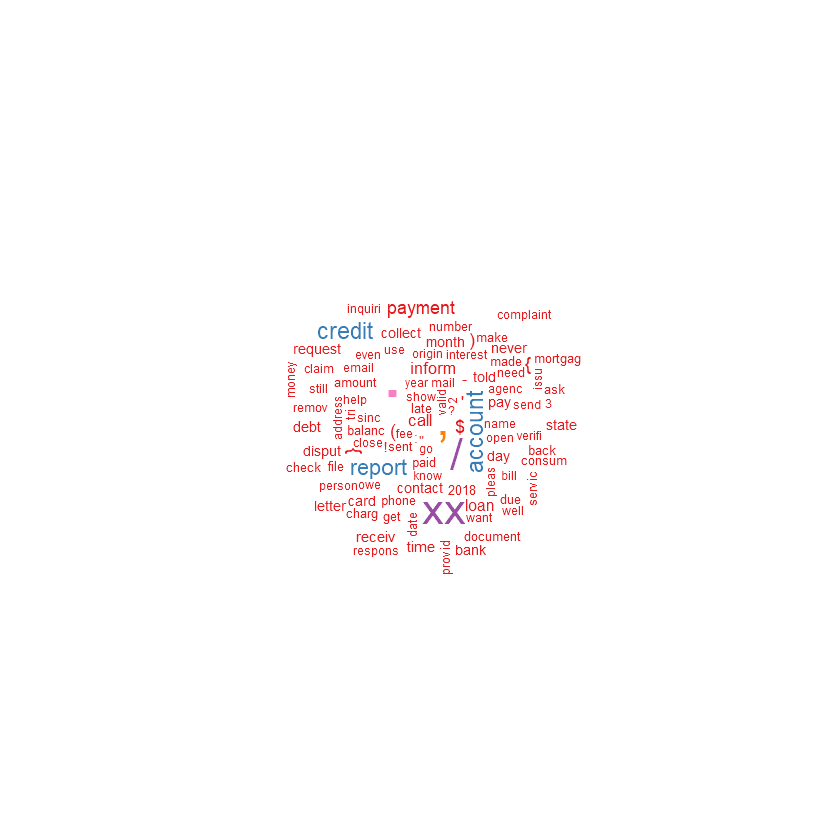

In [46]:
library(wordcloud)
  set.seed(142)   #keeps cloud' shape fixed
  dark2 <- brewer.pal(8, "Set1")   
  freq<-topfeatures(dfm.stem, n=100)
  
  wordcloud(names(freq), 
            freq, max.words=200, 
            scale=c(4, .5), 
            colors=brewer.pal(8, "Set1"))

## Again to assure the same complain reason on a wordcloud. 

## 4. What type of product issues & complaints are the most frequency?
### Soln:

In [30]:
DF = read.csv("C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Consumer_Complaints.csv", na.strings = c("","NA"))

In [31]:
t= data.frame(table(DF$Product))
colnames(t) <- c("Text", "Count")


In [32]:
t

Text,Count
Checking or savings account,21141
Credit card or prepaid card,24168
"Credit reporting, credit repair services, or other personal consumer reports",111277
Debt collection,51072
"Money transfer, virtual currency, or money service",5406
Mortgage,24521
"Payday loan, title loan, or personal loan",4355
Student loan,8743
Vehicle loan or lease,5874


> ### From the above matrix we can see that the most repetative product complains were with "Credit reporting, credit repair services, or other personal consumer reports" followed by "Debt collection"

## PART 2: Cluster Analysis
*Assume you are an analytics consultant and have been tasked with understanding
critical behaviors and trends of Casino customers. Using BigML’s cluster modeling tools
provide answer the following questions:*

● What is the average spending by gender, age, and game.

● Identify 3 segments (clusters) that exceed average spending

● Giving you segments above, how would you recommend the Casino to market
these clusters

In [64]:
DF1 = read.csv("C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\BIGML.csv", na.strings = c("","NA"))

In [65]:
head(DF1)

Player,Slots,BJ,Craps,Bac,Bingo,Poker,Other,Total.Spend,Gender,Age
Player 1,1013,6190,4276,868,0,0,0,12348,Female,58
Player 2,68,23,23,12,0,28,53,207,Male,55
Player 3,148,0,0,0,0,0,0,148,Female,34
Player 4,63,17,28,9,0,23,52,193,Male,21
Player 5,92,44,18,10,0,26,60,250,Female,68
Player 6,658,0,0,0,106,0,0,764,Female,59


### What is the average spending by gender, age, and game.
### SOLN:


In [50]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [67]:
# Average spending by Gender
grouped_gender= DF1 %>% group_by(Gender) %>% summarise(Average_spending = mean(Total.Spend))
grouped_gender

Gender,Average_spending
Female,1147.538
Male,1098.050


In [70]:
library(ggplot2)


Attaching package: 'ggplot2'

The following object is masked from 'package:NLP':

    annotate



Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

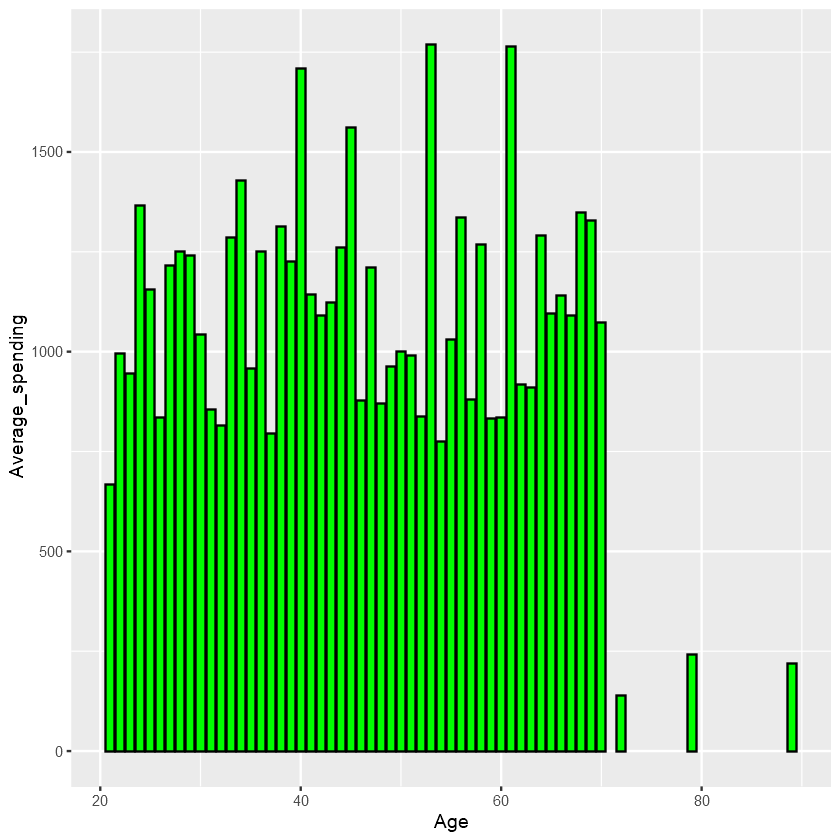

In [85]:
# Average spending by Age
grouped_Age= DF1 %>% group_by(Age) %>% summarise(Average_spending = mean(Total.Spend)) %>% arrange(Average_spending)
ggplot(data = grouped_Age, aes(x= Age,y=Average_spending))+ geom_histogram(stat = "identity",color = "Black",fill="green")

In [89]:
#Bottom 5 averages
head(grouped_Age)
#Top 5 Averages
tail(grouped_Age)

Age,Average_spending
72,139.0000
89,220.0000
79,241.0000
21,666.3103
54,774.4946
37,794.8471


Age,Average_spending
24,1367.071
34,1429.218
45,1560.878
40,1708.504
61,1764.258
53,1769.243


In [108]:
# average spending by games
avg_games= colMeans(DF1[2:8][sapply(DF1[2:8], is.numeric)])
avg_games = data.frame(avg_games)


In [109]:
head(avg_games)

,avg_games
Slots,291.7742
BJ,283.2906
Craps,267.6272
Bac,82.0686
Bingo,10.0864
Poker,54.5922


### Above is average spending from each game

### Identify 3 segments (clusters) that exceed average spending

### Giving you segments above, how would you recommend the Casino to market these clusters

## K mean Cluster Report with 10 cluster from BIGml:
K-means Cluster (k=10) with 10 centroids
Data distribution:

    Global: 100% (5000 instances)
    Cluster 0: 10.10% (505 instances)
    Cluster 1: 19.94% (997 instances)
    Cluster 2: 2.72% (136 instances)
    Cluster 3: 24.90% (1245 instances)
    Cluster 4: 3.96% (198 instances)
    Cluster 5: 2.54% (127 instances)
    Cluster 6: 1.96% (98 instances)
    Cluster 7: 8.66% (433 instances)
    Cluster 8: 9.22% (461 instances)
    Cluster 9: 16.00% (800 instances)
    
Cluster metrics:

    total_ss (Total sum of squares): 11630.779640
    within_ss (Total within-cluster sum of the sum of squares): 2846.241680
    between_ss (Between sum of squares): 8784.537960
    ratio_ss (Ratio of sum of squares): 0.755280
Centroids:

    Global: Poker: 54.80721, Other: 133.93921, Bac: 83.18245, Bingo: 10.12061, BJ: 285.78182, Craps: 270.05518, Player: [], Slots: 294.08529, Total Spend: 1131.97974, Gender: "Male", Age: 45.45996
    
    Cluster 0: Poker: 205.56891, Other: 500.7796, Bac: 97.08288, Bingo: 0, BJ: 307.82574, Craps: 205.07286, Player: [], Slots: 702.73345, Total Spend: 2019.0929, Gender: "Female", Age: 34.03036
    
    Cluster 1: Poker: 10.21361, Other: 27.14923, Bac: 12.32737, Bingo: 0.61543, BJ: 42.44192, Craps: 25.69372, Player: [], Slots: 117.69085, Total Spend: 236.10273, Gender: "Female", Age: 36.14907
    
    Cluster 2: Poker: 0, Other: 0, Bac: 1067.04343, Bingo: 0, BJ: 3059.01241, Craps: 3553.73733, Player: [], Slots: 974.55843, Total Spend: 8654.32058, Gender: "Female", Age: 46.21613
    
    Cluster 3: Poker: 10.85073, Other: 28.08722, Bac: 15.46224, Bingo: 0.40255, BJ: 36.85912, Craps: 29.62865, Player: [], Slots: 121.34393, Total Spend: 242.65607, Gender: "Male", Age: 59.88004
    
    Cluster 4: Poker: 1.51695, Other: 530.77119, Bac: 0.85285, Bingo: 0, BJ: 3.66102, Craps: 2.02157, Player: [], Slots: 2.12789, Total Spend: 540.95146, Gender: "Female", Age: 45.23883
    
    Cluster 5: Poker: 0, Other: 0, Bac: 1014.73755, Bingo: 0, BJ: 4850.41588, Craps: 4689.15478, Player: [], Slots: 1023.78331, Total Spend: 11578.15882, Gender: "Male", Age: 45.50067
    
    Cluster 6: Poker: 522.00478, Other: 0, Bac: 0, Bingo: 0, BJ: 0, Craps: 0, Player: [], Slots: 0, Total Spend: 522.00478, Gender: "Male", Age: 45.01115
    
    Cluster 7: Poker: 196.9158, Other: 514.70703, Bac: 99.13118, Bingo: 0, BJ: 298.94468, Craps: 199.76305, Player: [], Slots: 670.53027, Total Spend: 1980.00174, Gender: "Female", Age: 58.45059
    
    Cluster 8: Poker: 0, Other: 0, Bac: 0, Bingo: 105.69913, BJ: 0, Craps: 0, Player: [], Slots: 396.75301, Total Spend: 502.45114, Gender: "Male", Age: 45.71888
    
    Cluster 9: Poker: 10.85826, Other: 30.00209, Bac: 15.38223, Bingo: 0.28748, BJ: 40.2812, Craps: 30.78349, Player: [], Slots: 123.83638, Total Spend: 251.42599, Gender: "Male", Age: 33.19197


### Recommendation for the casino:
1) First thing would be to not spend a lot the resources on Bingo as it has the least average spending with most cluster with 0 spending in Bingo.

2) Second would be to reach out to the specific clusters with offers for the games that they have spending above average spending for each game for the complete dataset
- like approaching cluster 5 with "Bac","BJ","Craps" and "Slots" deals
- cluster 2 with "Bac", "BJ","Craps","Slots" deals
- cluster 0 with "Bac","BJ","Craps","Slots" deals

3) it is observed that Players with high average spending are inclined towards playing games like "Bac","BJ","Craps" and "Slots" and dont prefer other games so they should be rechead out with offers in these games.

4) According to Average spending per game "Slots" has the highest average spending and my suggestion would be to have more facilities for Slots to avoid customers standing in queue to play it.
